# **Title of the Project: "Home Loan Prediction"**

---


## **Objective**

The dataset is formed by taking into consideration various information of 614
individuals.

The problem is: based on the given application from each application, we have to predict if they are eligible for home loan or not.

## **Data Source**

The data is collected from Kaggle platform.

## **Import Liberaries**

Let's import all the necessary liberaries.For visualization, we will be using `numpy` and `pandas` to start with. We will be using `pyplot` (subpackage of `matplotlib`) as well as `seaborn`.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

## **Imorting Data and Explanation of Features**

The dataset is stored in `train.csv` file. we will use `read_csv` to read the data.

In [ ]:
df=pd.read_csv('/content/train (2).csv')

## **Data Description**

The dataset is now loaded into the variable `df`. I'll just take a glimpse of the data using the `desribe()` and `info()` methods before I actually start processing and visualizing it.

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.columns.values.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Loan_Status_N',
 'Loan_Status_Y']

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The dataset consists of 614 individuals data.
There are 13 columns in the dataset, which are as follows-

1. Loan_Id :Displays the unique ID of loan application of an individual.

2. Gender : displays the gender of the individual as `Male` or `Female`.

3. married: Displays their Marital status as
              1 = Married
               2 = unmarried

4. Dependents

5. Education : Displays the qualifications of the applicant as

                1 = graduate
                2 = non-graduate

6. Self_employed: Displays the occupation type of the applicant as
               
               Self_employed = yes
           non-self_employed = no

7. Applicant/income: Displays the income of the applicant

8. CoapplicantIncome: Displays the income of co-applicant or nominee

9. LoanAmount: Displays the amount asked by the applicant

10. Loan_Amount_term: Displays the time period of loan

11. Credit_History: Displays if the applicant have already borrowed
     another loan as
             yes = 1.0
             no = NaN

12. Property_Area: Displays the locality of the property for which loan
     is being borrowed as
           1 = Rural
           2 = Urban
           3 = SemiUrban

13. Loan_status :Display whether the loan has passed or not which is shown     
     as
             y=Yes
             n=NO     



In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **Pre Processing**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = pd.to_numeric(df['Dependents'])

In [ ]:
 df.shape

(614, 18)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: >

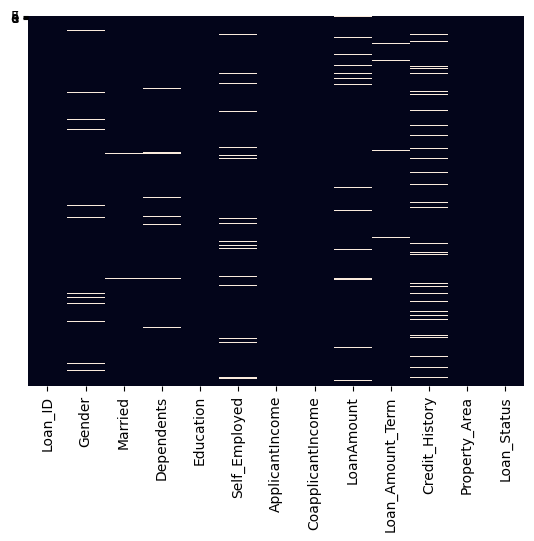

In [ ]:
sns.heatmap(df.isnull(), yticklabels='False', cbar=False)

<ipython-input-18-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

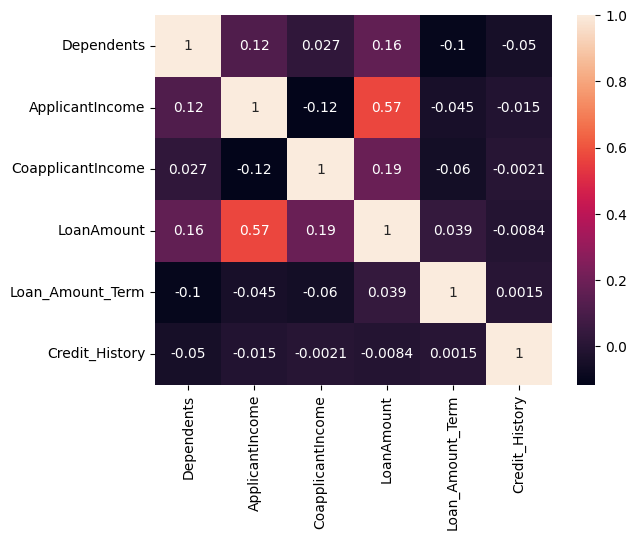

In [ ]:
sns.heatmap(df.corr(), annot=True)

# **Problems in dataset**


* we don't need Loan_ID  column so dropping it
* Gender, Married, Education, Self_Employed, Property_area, Loan_status are string type values so we will convert it into 0,1,2 s......
*   some rows contain null values so replacing them by: Mean, Mode, Median or User-defined Function




In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.drop(['Dependents'],axis=1,inplace=True)

##  **Data** **Visualization**

<Axes: xlabel='Loan_Status', ylabel='count'>

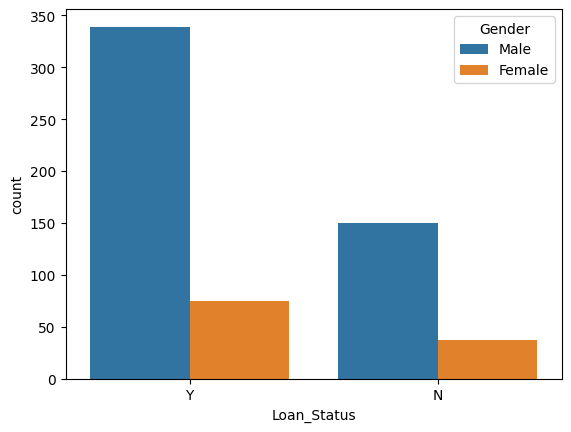

In [ ]:
sns.countplot(data=df,x="Loan_Status",hue='Gender')

<Axes: xlabel='Loan_Status', ylabel='count'>

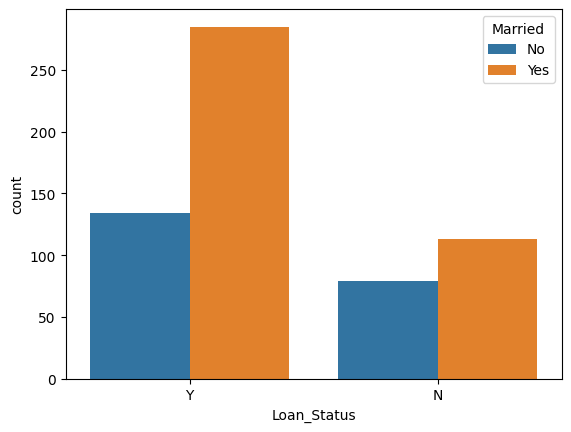

In [ ]:
sns.countplot(data=df,x="Loan_Status",hue='Married')

<Axes: xlabel='Loan_Status', ylabel='count'>

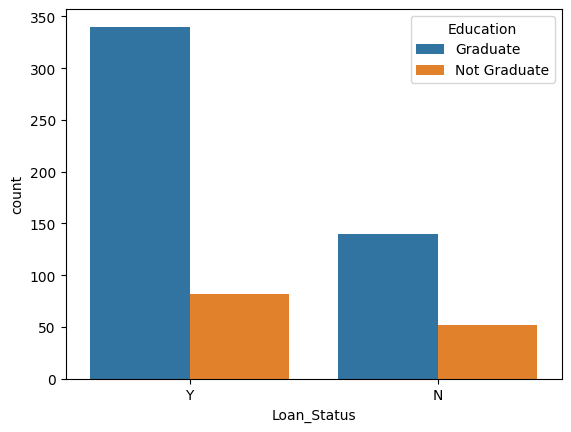

In [ ]:
sns.countplot(data=df,x="Loan_Status",hue='Education')

<Axes: xlabel='Loan_Status', ylabel='count'>

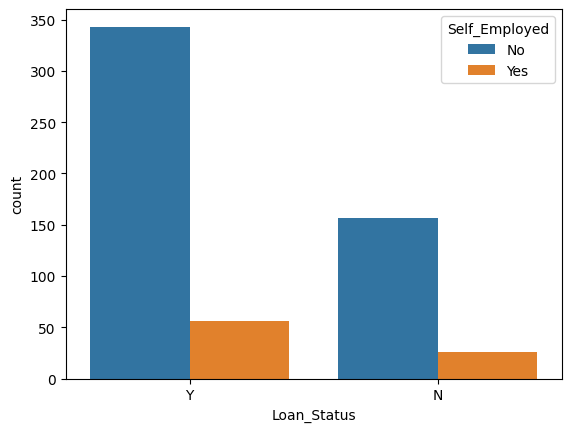

In [ ]:
sns.countplot(data=df,x="Loan_Status",hue='Self_Employed')

<Axes: xlabel='Loan_Status', ylabel='count'>

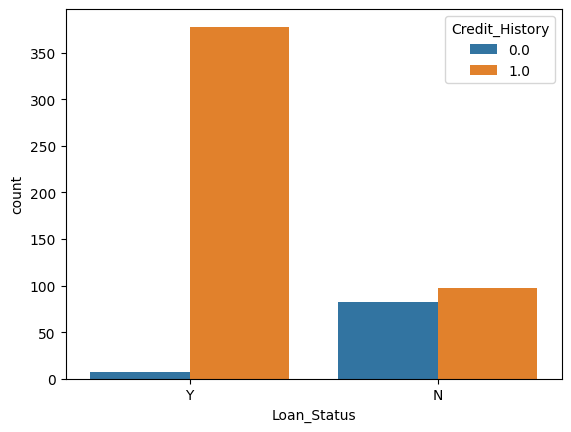

In [ ]:
sns.countplot(data=df,x="Loan_Status",hue='Credit_History')

<Axes: xlabel='Loan_Status', ylabel='count'>

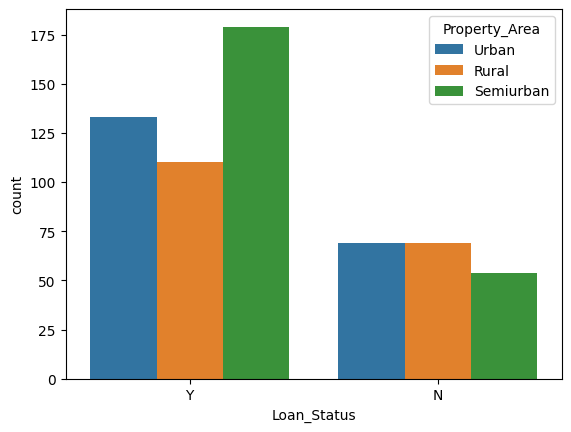

In [ ]:
sns.countplot(data=df,x="Loan_Status",hue='Property_Area')

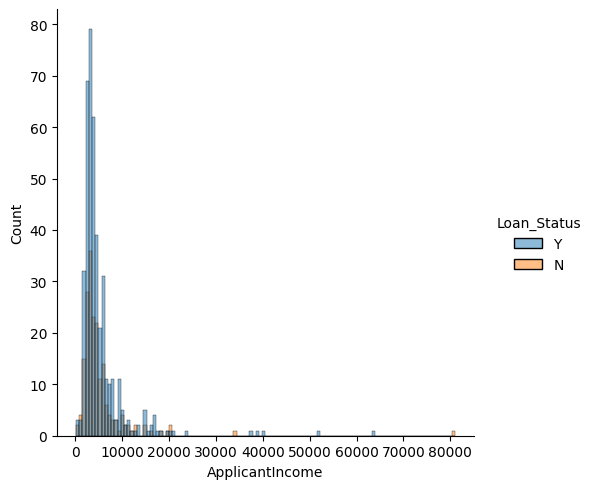

In [ ]:

sns.displot(data=df,x="ApplicantIncome",hue='Loan_Status')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

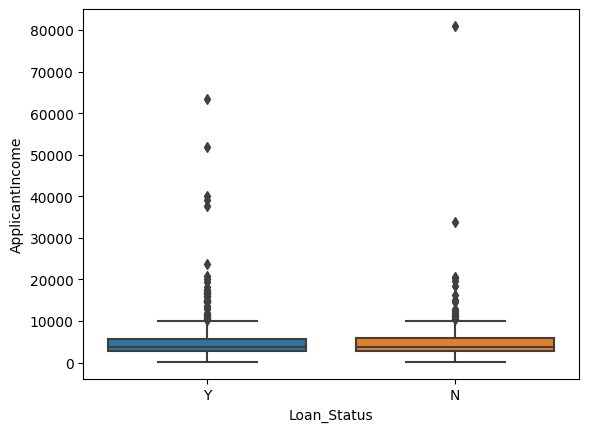

In [ ]:
sns.boxplot(data=df, x="Loan_Status",y="ApplicantIncome")

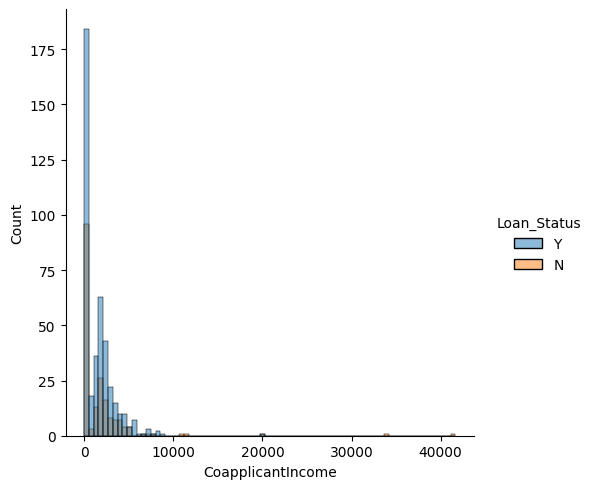

In [ ]:
sns.displot(df,x="CoapplicantIncome",hue='Loan_Status')

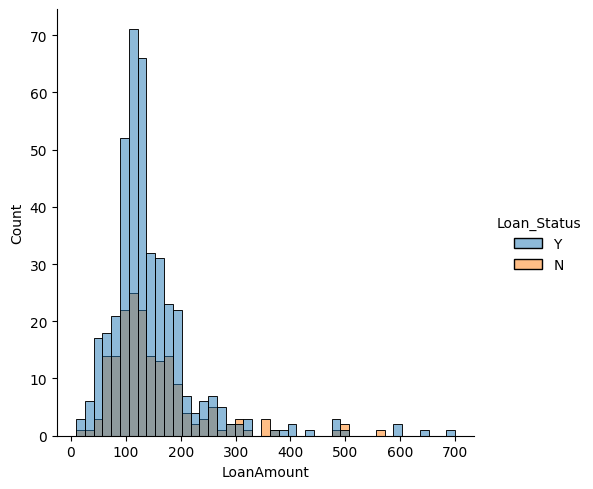

In [ ]:
sns.displot(df,x="LoanAmount",hue='Loan_Status')

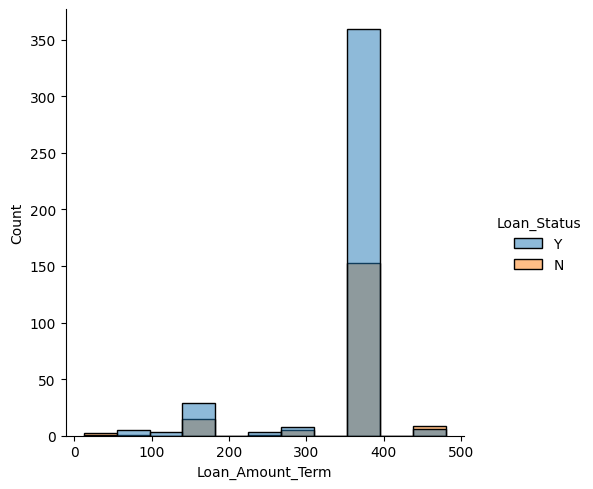

In [ ]:
sns.displot(df,x="Loan_Amount_Term",hue='Loan_Status')

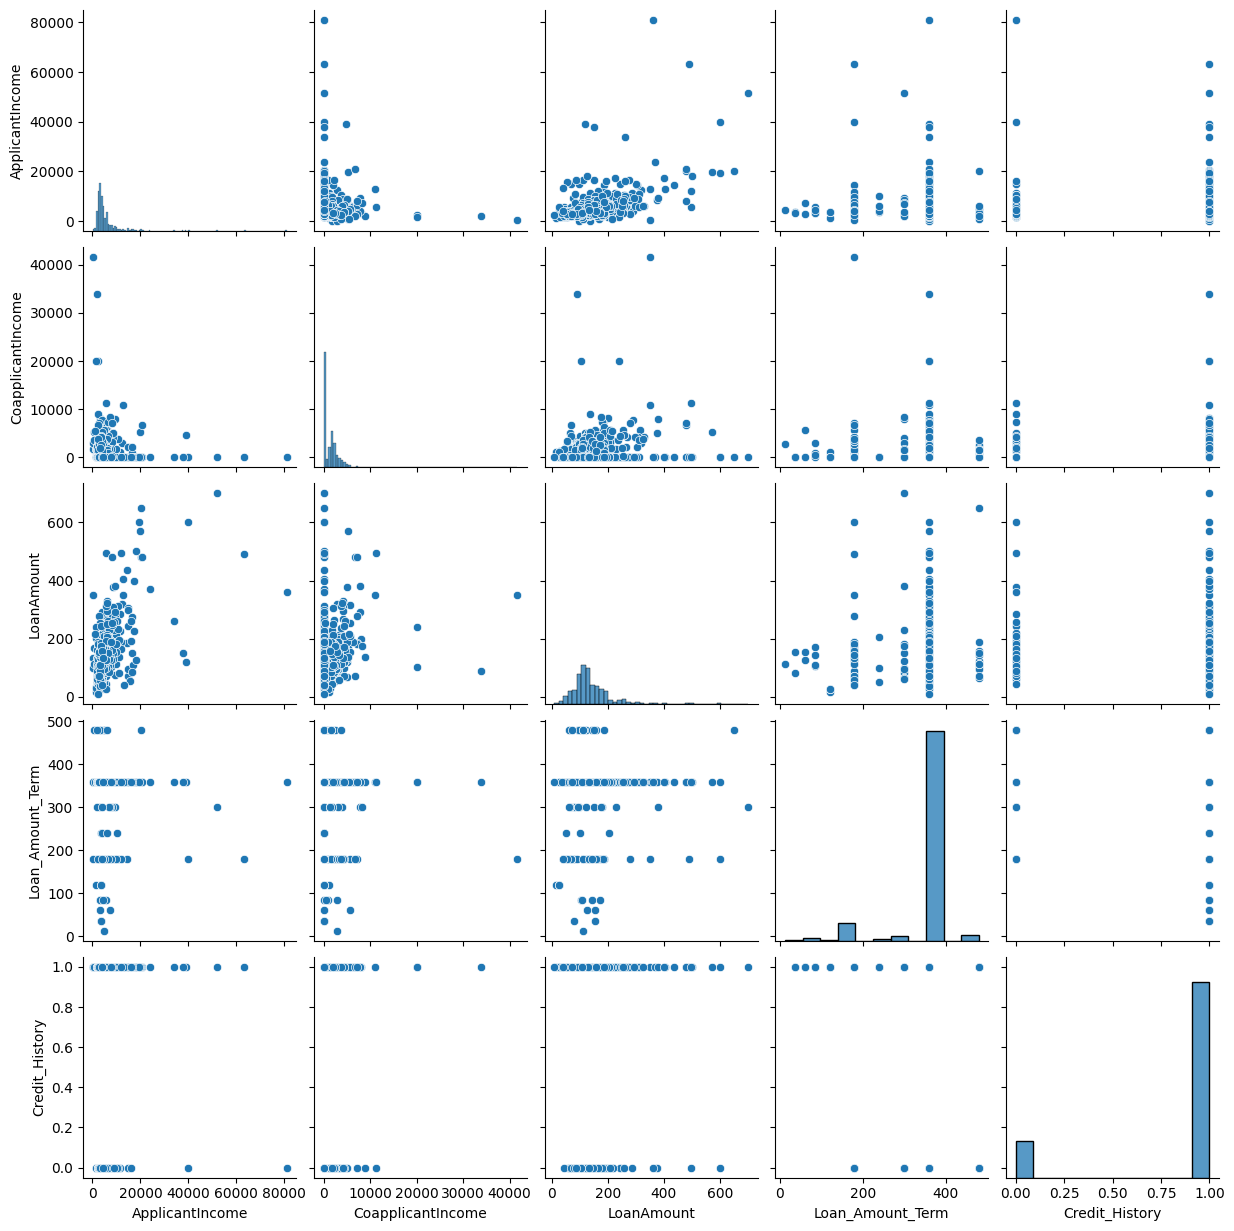

In [ ]:
sns.pairplot(df)

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)


In [ ]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
Gender = pd.get_dummies(df["Gender"], drop_first = True)
df["Gender"] = Gender


In [ ]:
Married = pd.get_dummies(df["Married"], drop_first = True)
df["Married"] = Married

In [ ]:
Education = pd.get_dummies(df["Education"], drop_first = True)
df["Education"] = Education

In [ ]:
Self_Employed = pd.get_dummies(df["Self_Employed"], drop_first = True)
df["Self_Employed"] = Self_Employed

In [ ]:
Loan_Status = pd.get_dummies(df["Loan_Status"], drop_first = True)
df["Loan_Status"] = Loan_Status

In [ ]:
encoder = LabelEncoder()
df["Property_Area"] = encoder.fit_transform(df["Property_Area"])

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.072991,-0.554487,0.000000,0.273231,1.0,2,1
1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0,0
2,1,1,0,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,2,1
3,1,1,1,0,-0.462062,0.251980,-0.314547,0.273231,1.0,2,1
4,1,0,0,0,0.097728,-0.554487,-0.064454,0.273231,1.0,2,1


In [ ]:

from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the features you want to scale
features_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected features
scaler.fit(df[features_to_scale])

# Transform the selected features using standardization
df_scaled = pd.DataFrame(scaler.transform(df[features_to_scale]), columns=features_to_scale)

# Replace the original features with the scaled features in the DataFrame
df[features_to_scale] = df_scaled


In [ ]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## **Train test Split**

In [ ]:
predictors = df.drop("Loan_Status",axis=1)
target = df["Loan_Status"]

## **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,Loan_Status,test_size=0.2,random_state=0)

**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

## **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, Y_train)

In [ ]:
Y_pred = logreg.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8373983739837398


Thank **You**

